<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_05_BOW_%EA%B8%B0%EB%B0%98%EC%9D%98_%EB%AC%B8%EC%84%9C%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5. BOW 기반의 문서 분류


## 1. 20 뉴스그룹 데이터 준비 및 특성 추출

 http://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [ ]:
from sklearn.datasets import fetch_20newsgroups

#20개의 토픽 중 선택하고자 하는 토픽을 리스트로 생성
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

#학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train',
#메일 내용에서 hint가 되는 부분을 삭제 - 순수하게 내용만으로 분류
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
#검증 데이터셋을 가져옴
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Test set size:', len(newsgroups_test.data))
print('#Selected categories:', newsgroups_train.target_names)
print('#Train labels:', set(newsgroups_train.target))

#Train set size: 2034
#Test set size: 1353
#Selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
#Train labels: {0, 1, 2, 3}


In [ ]:
print('#Train set text samples:', newsgroups_train.data[0])
print('#Train set label smaples:', newsgroups_train.target[0])
print('#Test set text samples:', newsgroups_test.data[0])
print('#Test set label smaples:', newsgroups_test.target[0])

#Train set text samples: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
#Train set label smaples: 1
#Test set text samples: TRry the SKywatch project in  Arizona.
#Test set label smaples: 2


In [ ]:
X_train = newsgroups_train.data   #학습 데이터셋 문서
y_train = newsgroups_train.target #학습 데이터셋 라벨

X_test = newsgroups_test.data     #검증 데이터셋 문서
y_test = newsgroups_test.target   #검증 데이터셋 라벨

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2000, min_df=5, max_df=0.5)

X_train_cv = cv.fit_transform(X_train) # train set을 변환
print('Train set dimension:', X_train_cv.shape)
X_test_cv = cv.transform(X_test) # test set을 변환
print('Test set dimension:', X_test_cv.shape)

Train set dimension: (2034, 2000)
Test set dimension: (1353, 2000)


In [ ]:
for word, count in zip(cv.get_feature_names_out()[:100], X_train_cv[0].toarray()[0, :100]):
    print(word, ':', count, end=', ')

00 : 0, 000 : 0, 01 : 0, 04 : 0, 05 : 0, 10 : 0, 100 : 0, 1000 : 0, 11 : 0, 12 : 0, 128 : 0, 129 : 0, 13 : 0, 130 : 0, 14 : 0, 15 : 0, 16 : 0, 17 : 0, 18 : 0, 19 : 0, 1987 : 0, 1988 : 0, 1989 : 0, 1990 : 0, 1991 : 0, 1992 : 0, 1993 : 0, 20 : 0, 200 : 0, 202 : 0, 21 : 0, 22 : 0, 23 : 0, 24 : 0, 25 : 0, 256 : 0, 26 : 0, 27 : 0, 28 : 0, 2d : 0, 30 : 0, 300 : 0, 31 : 0, 32 : 0, 33 : 0, 34 : 0, 35 : 0, 39 : 0, 3d : 0, 40 : 0, 400 : 0, 42 : 0, 45 : 0, 50 : 0, 500 : 0, 60 : 0, 600 : 0, 65 : 0, 70 : 0, 75 : 0, 80 : 0, 800 : 0, 90 : 0, 900 : 0, 91 : 0, 92 : 0, 93 : 0, 95 : 0, _the : 0, ability : 0, able : 1, abortion : 0, about : 1, above : 0, absolute : 0, absolutely : 0, ac : 0, accept : 0, acceptable : 0, accepted : 0, access : 0, according : 0, account : 0, accurate : 0, across : 0, act : 0, action : 0, actions : 0, active : 0, activities : 0, activity : 0, acts : 0, actual : 0, actually : 0, ad : 0, add : 0, added : 0, addition : 0, additional : 0, address : 0, 

In [ ]:
X_train_cv[0].shape

(1, 2000)

In [ ]:
for word, count in zip(cv.get_feature_names_out()[600:700], X_train_cv[0].toarray()[0, 600:700]):
    print(word, ':', count, end=', ')

enough : 0, enter : 0, entire : 0, entirely : 0, environment : 0, equipment : 0, error : 0, errors : 0, esa : 0, especially : 0, essentially : 0, established : 0, et : 0, etc : 0, eternal : 0, european : 0, even : 0, event : 0, events : 0, eventually : 0, ever : 0, every : 0, everyone : 0, everything : 0, evidence : 0, evil : 0, evolution : 0, ex : 0, exactly : 0, example : 0, examples : 0, excellent : 0, except : 0, excuse : 0, exist : 0, existence : 0, existing : 0, exists : 0, expect : 0, expected : 0, expensive : 0, experience : 0, experiment : 0, explain : 0, explanation : 0, exploration : 0, export : 0, extended : 0, external : 0, extra : 0, eye : 0, face : 0, facility : 0, fact : 0, factor : 0, facts : 0, failed : 0, fair : 0, fairly : 0, faith : 0, fall : 0, fallacy : 0, false : 0, family : 0, faq : 0, far : 0, fast : 0, faster : 0, father : 0, fax : 0, fbi : 0, fear : 0, features : 0, federal : 0, fee : 0, feel : 0, feet : 0, few : 0, fi : 0, fiction : 0, field : 0, figure : 0

In [ ]:
X_train_cv[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
type(X_train_cv[0].toarray())

numpy.ndarray

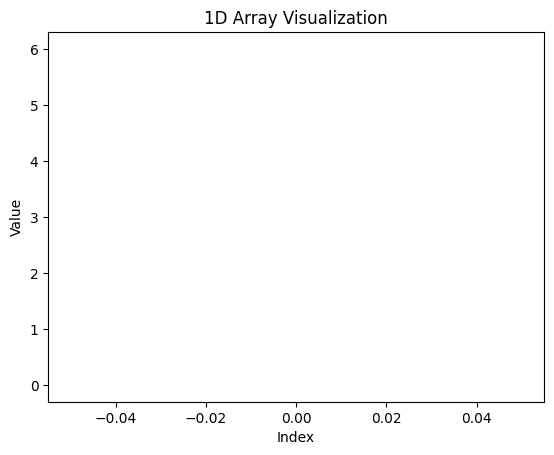

In [ ]:
# 시각화
arr_1d= X_train_cv[0].toarray()
plt.plot(arr_1d)  # 선 그래프
plt.title("1D Array Visualization")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

In [ ]:
arr_1d.reshape(20,100)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

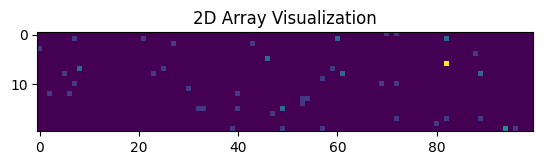

In [ ]:
# 히트맵 시각화
arr_2d = arr_1d.reshape(20,100)
plt.imshow(arr_2d, cmap='viridis', interpolation='none')
# plt.colorbar()  # 색상 막대 추가
plt.title("2D Array Visualization")
plt.show()

## 2. 머신러닝과 문서 분류 과정에 대한 이해


## 3. 나이브 베이즈 분류기(Naive Bayse Classifier)를 이용한 문서 분류

1. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
from sklearn.naive_bayes import MultinomialNB #sklearn이 제공하는 MultinomialNB 를 사용
NB_clf = MultinomialNB() # 분류기 선언

NB_clf.fit(X_train_cv, y_train) #train set을 이용하여 분류기(classifier)를 학습

print('Train set score: {:.3f}'.format(NB_clf.score(X_train_cv, y_train))) #train set에 대한 예측정확도를 확인
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_cv, y_test))) #test set에 대한 예측정확도를 확인

Train set score: 0.824
Test set score: 0.732


In [ ]:
# prompt: cndusion matrix

from sklearn.metrics import confusion_matrix

y_pred = NB_clf.predict(X_test_cv)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[204   9  30  76]
 [ 14 341  24  10]
 [ 41  30 302  21]
 [ 85   6  16 144]]


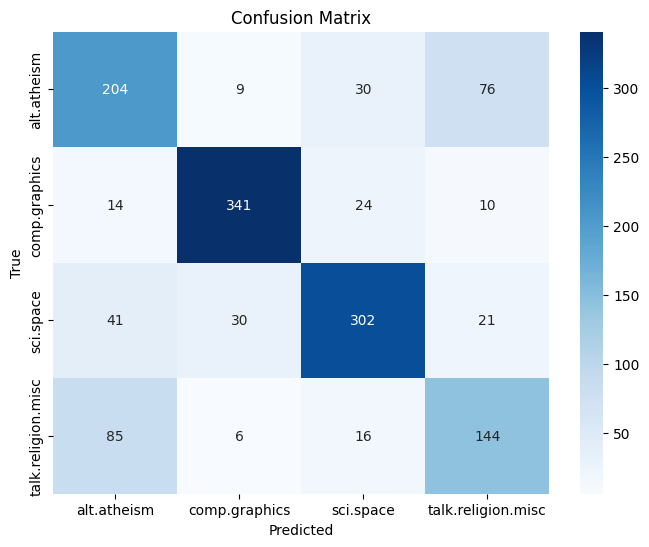

In [ ]:
# prompt: cndusion matrix 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups_train.target_names, yticklabels=newsgroups_train.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# prompt: classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=newsgroups_train.target_names))


                    precision    recall  f1-score   support

       alt.atheism       0.59      0.64      0.62       319
     comp.graphics       0.88      0.88      0.88       389
         sci.space       0.81      0.77      0.79       394
talk.religion.misc       0.57      0.57      0.57       251

          accuracy                           0.73      1353
         macro avg       0.72      0.71      0.71      1353
      weighted avg       0.74      0.73      0.73      1353



In [ ]:
print('#First document and label in test data:', X_test[0], y_test[0])
print('#Second document and label in test data:', X_test[1], y_test[1])

pred = NB_clf.predict(X_test_cv[:2])

print('#Predicted labels:', pred)
print('#Predicted categories:', newsgroups_train.target_names[pred[0]], newsgroups_train.target_names[pred[1]])

#First document and label in test data: TRry the SKywatch project in  Arizona. 2
#Second document and label in test data: The Vatican library recently made a tour of the US.
 Can anyone help me in finding a FTP site where this collection is 
 available. 1
#Predicted labels: [2 1]
#Predicted categories: sci.space comp.graphics


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#CountVectorizer와 동일한 인수를 사용
tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.5)
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환

NB_clf.fit(X_train_tfidf, y_train) #tfidf train set을 이용하여 분류기(classifier)를 새로 학습
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train))) #train set에 대한 예측정확도를 확인
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test))) #test set에 대한 예측정확도를 확인

Train set score: 0.862
Test set score: 0.741


## 4. 로지스틱 회귀분석을 이용한 문서 분류

1: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression #sklearn이 제공하는 logistic regression을 사용

#count vector에 대해 regression을 해서 NB와 비교
LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도
print('Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.929
Test set score: 0.735


### 릿지 회귀(ridge regression)


In [ ]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

Train set score: 0.960
Test set score: 0.735


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(
    X_train_tfidf, y_train, test_size=0.2, random_state=42)

max_score = 0
max_alpha = 0
for alpha in np.arange(0.1, 10, 0.1): # alpha를 0.1부터 10까지 0.1씩 증가
    ridge_clf = RidgeClassifier(alpha=alpha) #릿지 분류기 선언
    ridge_clf.fit(X_train_ridge, y_train_ridge) #학습
    score = ridge_clf.score(X_val_ridge, y_val_ridge) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경한다.
        max_score = score
        max_alpha = alpha
print('Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

Max alpha 1.600 at max validation score 0.826


In [ ]:
ridge_clf = RidgeClassifier(alpha=1.6) #릿지 분류기 선언
ridge_clf.fit(X_train_tfidf, y_train) #학습

print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

Train set score: 0.947
Test set score: 0.739


In [ ]:
top10_features(ridge_clf, tfidf, newsgroups_train.target_names)

alt.atheism: bobby, religion, atheism, atheists, motto, punishment, islam, deletion, islamic, satan
comp.graphics: graphics, computer, 3d, file, image, hi, 42, using, screen, looking
sci.space: space, orbit, nasa, spacecraft, moon, sci, launch, flight, funding, idea
talk.religion.misc: christian, christians, fbi, blood, order, jesus, objective, children, christ, hudson


### 라쏘 회귀분석(lasso regression)을 이용한 특성 선택(feature selection)

1. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf, y_train) # train data로 학습

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))

# 계수(coefficient) 중에서 0이 아닌 것들의 개수를 출력
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1])

#Train set score: 0.819
#Test set score: 0.724
#Used features count: 437 out of 2000


In [ ]:
top10_features(lasso_clf, tfidf, newsgroups_train.target_names)

alt.atheism: bobby, atheism, atheists, islam, religion, islamic, motto, atheist, satan, vice
comp.graphics: graphics, image, 3d, file, computer, hi, video, files, looking, sphere
sci.space: space, orbit, launch, nasa, spacecraft, flight, moon, dc, shuttle, solar
talk.religion.misc: fbi, christian, christians, christ, order, jesus, children, objective, context, blood


## 5. 결정트리 등을 이용한 기타 문서 분류 방법

1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

tree = DecisionTreeClassifier(random_state=7)
tree.fit(X_train_tfidf, y_train)
print('#Decision Tree train set score: {:.3f}'.format(tree.score(X_train_tfidf, y_train)))
print('#Decision Tree test set score: {:.3f}'.format(tree.score(X_test_tfidf, y_test)))

forest = RandomForestClassifier(random_state=7)
forest.fit(X_train_tfidf, y_train)
print('#Random Forest train set score: {:.3f}'.format(forest.score(X_train_tfidf, y_train)))
print('#Random Forest test set score: {:.3f}'.format(forest.score(X_test_tfidf, y_test)))

gb = GradientBoostingClassifier(random_state=7)
gb.fit(X_train_tfidf, y_train)
print('#Gradient Boosting train set score: {:.3f}'.format(gb.score(X_train_tfidf, y_train)))
print('#Gradient Boosting test set score: {:.3f}'.format(gb.score(X_test_tfidf, y_test)))

#Decision Tree train set score: 0.977
#Decision Tree test set score: 0.536
#Random Forest train set score: 0.977
#Random Forest test set score: 0.685
#Gradient Boosting train set score: 0.933
#Gradient Boosting test set score: 0.696


In [ ]:
sorted_feature_importances = sorted(zip(tfidf.get_feature_names_out(), gb.feature_importances_), key=lambda x: x[1], reverse=True)
for feature, value in sorted_feature_importances[:40]:
    print('%s: %.3f' % (feature, value), end=', ')

space: 0.126, graphics: 0.080, atheism: 0.024, thanks: 0.023, file: 0.021, orbit: 0.020, jesus: 0.018, god: 0.018, hi: 0.017, nasa: 0.015, image: 0.015, files: 0.014, christ: 0.010, moon: 0.010, bobby: 0.010, launch: 0.010, looking: 0.010, christian: 0.010, atheists: 0.009, christians: 0.009, fbi: 0.009, 3d: 0.008, you: 0.008, not: 0.008, islamic: 0.007, religion: 0.007, spacecraft: 0.007, flight: 0.007, computer: 0.007, islam: 0.007, ftp: 0.006, color: 0.006, software: 0.005, atheist: 0.005, card: 0.005, people: 0.005, koresh: 0.005, his: 0.005, kent: 0.004, sphere: 0.004, 

## 6. 성능을 높이기 위한 방법들



In [ ]:
# 필요한 library들을 import
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import re

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) #이렇게 해도 되는지 확인
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    # portr stemmer 적용
    features = (list(map(lambda token: PorterStemmer().stem(token),words)))
    return features

tfidf = TfidfVectorizer(tokenizer=tokenizer, max_features=2000, min_df=5, max_df=0.5) # 새로 정의한 토크나이저 사용
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환

#tfidf vector를 이용해서 분류기 학습
LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

#Train set score: 0.930
#Test set score: 0.751


In [ ]:
len(LR_clf.coef_[0])

2000

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=tokenizer)

X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
print('#Train set dimension:', X_train_tfidf.shape) # 실제로 몇개의 특성이 사용되었는지 확인
X_test_tfidf = tfidf.transform(X_test) # test set을 변환
print('#Test set dimension:', X_test_tfidf.shape)

ridge_clf = RidgeClassifier(alpha=2.4)
ridge_clf.fit(X_train_tfidf, y_train) #학습
print('#Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

NB_clf = MultinomialNB(alpha=0.01) # 분류기 선언
NB_clf.fit(X_train_tfidf, y_train) #train set을 이용하여 분류기(classifier)를 학습
print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train))) #train set에 대한 예측정확도를 확인
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test))) #test set에 대한 예측정확도를 확인

#Train set dimension: (2034, 20085)
#Test set dimension: (1353, 20085)
#Train set score: 0.968
#Test set score: 0.768
#Train set score: 0.971
#Test set score: 0.793


## 7. 카운트 기반의 문제점과 N-gram


In [ ]:
cachedStopWords = stopwords.words("english")
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}", # 토큰화를 위한 정규식
                        decode_error ='ignore',
                        lowercase=True,
                        stop_words = stopwords.words('english'),
                        max_df=0.5,
                        min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)

(2034, 11483)


In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

Train set score: 0.976
Test set score: 0.766


In [ ]:
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}",
                        decode_error ='ignore',
                        lowercase=True,
                        stop_words = stopwords.words('english'),
                        ngram_range=(1, 2), # 바이그램 설정
                        max_df=0.5,
                        min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)

(2034, 26550)


In [ ]:
bigram_features = [f for f in tfidf.get_feature_names_out() if len(f.split()) > 1]
print('bi-gram samples:', bigram_features[:10])

ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

bi-gram samples: ["'cause can't", "'em better", "'expected errors'", "'karla' next", "'nodis' password", "'official doctrine", "'ok see", "'sci astro'", "'what's moonbase", 'aas american']
Train set score: 0.976
Test set score: 0.773


In [ ]:
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}",
                        decode_error ='ignore',
                        lowercase=True,
                        stop_words = stopwords.words('english'),
                        ngram_range=(1, 3),
                        max_df=0.5,
                        min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf.shape)

trigram_features = [f for f in tfidf.get_feature_names_out() if len(f.split()) > 2]
print('tri-gram samples:', trigram_features[:10])

ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

(2034, 32943)
tri-gram samples: ["'em better shots", "'expected errors' basically", "'karla' next one", "'nodis' password also", "'official doctrine think", "'ok see warning", "'what's moonbase good", 'aas american astronautical', 'ability means infallible', 'able accept donations']
Train set score: 0.976
Test set score: 0.775


## 8. 한글 문서의 분류


In [ ]:
import pandas as pd
df = pd.read_csv('./data/daum_movie_review.csv')
df.head(5)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


In [ ]:
df.title.value_counts()

신과함께      4947
택시운전사     2322
인피니티 워    2042
범죄도시      1939
곤지암       1547
라라랜드      1150
코코         778
Name: title, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(df.review, df.title, random_state=0)
# 비율을 지정하지 않으면 75:25로 분할됨
print('#Train set size:', len(X_train)) # 실제로 몇개의 특성이 사용되었는지 확인
print('#Test set size:', len(X_test))

#Train set size: 11043
#Test set size: 3682


In [ ]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
#from konlpy.tag import Twitter #konlpy에서 Twitter 형태소 분석기를 import
okt = Okt()

print(okt.morphs(X_train[1])) #둘째 리뷰에 대해 형태소 단위로 tokenize
print(okt.nouns(X_train[1])) #둘째 리뷰에서 명사만 추출

['몰입', '할수밖에', '없다', '.', '어렵게', '생각', '할', '필요없다', '.', '내', '가', '전투', '에', '참여', '한', '듯', '손', '에', '땀', '이남', '.']
['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#Twitter 형태소분석기에서 명사만 추출하는 함수를 tokenizer로 이용
tfidf = TfidfVectorizer(tokenizer=okt.nouns, max_features=2000, min_df=5, max_df=0.5)

X_train_tfidf = tfidf.fit_transform(X_train) # train data 변환 -> tfidf vector
X_test_tfidf = tfidf.transform(X_test) # test data 변환 -> tfidf vector

# logistic regression 분류기 선언
clf = LogisticRegression(max_iter=1000) # 충분한 학습을 위해 max_iter를 1,000으로 설정, 기본은 100
clf.fit(X_train_tfidf, y_train) # 분류기 학습
print('#Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data 예측정확도
print('#Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data 예측정확도

#Train set score: 0.756
#Test set score: 0.694


In [ ]:
print('실제영화제목, 예측한 제목, 리뷰')
for content in zip(y_test[:10], clf.predict(X_test_tfidf[:10]), X_test[:10]):
    print(content)

실제영화제목, 예측한 제목, 리뷰
('범죄도시', '신과함께', '오랜만에 잼나는 영화 봤습니다.  다음에 더 재미있는 영화 기대하겠습니다.')
('범죄도시', '범죄도시', '조연들이 눈에 박힌다. 간만에 집중 ㅎ')
('코코', '코코', '대감동을 선사. 인사이드 아웃을 잇는 픽사의 감동스토리. 신과함께의 멕시코판이라고나할까요??')
('신과함께', '신과함께', '돈이 안아까웠던 영화ᆞᆞ  정말 좋았다')
('신과함께', '신과함께', '역시 김용화감독이 영화는 잘 만들어요. 이제 VFX 제작 부문도 헐리우드 수준 이상입니다.')
('택시운전사', '택시운전사', '민주화를 위해 힘써주신 분들께 감사하는 마음으로 살아야겠다.')
('신과함께', '신과함께', '잠만 자다 왔음')
('신과함께', '신과함께', '오랜만에 잼있고 좋은 영화를 봤다')
('범죄도시', '신과함께', '잼남')
('범죄도시', '인피니티 워', '대박~~')


### 성능을 개선하기 위한 노력


In [ ]:
tfidf = TfidfVectorizer(tokenizer=okt.morphs, max_features=2000, min_df=5, max_df=0.5) # 명사 대신 모든 형태소를 사용
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000) # 충분한 학습을 위해 max_iter를 1,000으로 설정, 기본은 100
clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data 예측정확도
print('#Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data 예측정확도

#Train set score: 0.777
#Test set score: 0.695


In [ ]:
def twit_tokenizer(text): #전체를 다 사용하는 대신, 명사, 동사, 형용사를 사용
    target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in okt.pos(text, norm=True, stem=True):
        if tag in target_tags:
            result.append(word)
    return result

tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, max_features=2000, min_df=5, max_df=0.5) #명사, 동사, 형용사를 이용하여 tfidf 생성
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000) # 충분한 학습을 위해 max_iter를 1,000으로 설정, 기본은 100
clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data 예측정확도
print('#Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data 예측정확도

#Train set score: 0.784
#Test set score: 0.712


In [ ]:
# 모든 형태소를 다 사용하고 품사를 알 수 있도록 하면?
def twit_tokenizer2(text):
    result = []
    for word, tag in okt.pos(text, norm=True, stem=True):
        result.append('/'.join([word, tag])) #단어의 품사를 구분할 수 있도록 함
    return result

print(twit_tokenizer2(X_train[1]))

['몰입/Noun', '하다/Verb', '없다/Adjective', './Punctuation', '어렵다/Adjective', '생각/Noun', '하다/Verb', '필요없다/Adjective', './Punctuation', '내/Noun', '가/Josa', '전투/Noun', '에/Josa', '참여/Noun', '한/Determiner', '듯/Noun', '손/Noun', '에/Josa', '땀/Noun', '이남/Noun', './Punctuation']


In [ ]:
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer2, max_features=2000, min_df=5, max_df=0.5)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000) # 충분한 학습을 위해 max_iter를 1,000으로 설정, 기본은 100
clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data 예측정확도
print('#Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data 예측정확도

#Train set score: 0.789
#Test set score: 0.718


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(
    X_train_tfidf, y_train, test_size=0.2, random_state=42)

max_score = 0
max_alpha = 0
for alpha in np.arange(0.1, 10, 0.1): # alpha를 0.1부터 10까지 0.1씩 증가
    ridge_clf = RidgeClassifier(alpha=alpha) #릿지 분류기 선언
    ridge_clf.fit(X_train_ridge, y_train_ridge) #학습
    score = ridge_clf.score(X_val_ridge, y_val_ridge) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경한다.
        max_score = score
        max_alpha = alpha
print('#Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

#Max alpha 1.600 at max validation score 0.727


In [ ]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier(alpha=1.6)
ridge_clf.fit(X_train_tfidf, y_train)
print('#Ridge Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('#Ridge Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

from sklearn.linear_model import LogisticRegression
import numpy as np
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)
lasso_clf.fit(X_train_tfidf, y_train)
print('#Lasso Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('#Lasso Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1])

#Ridge Train set score: 0.807
#Ridge Test set score: 0.726
#Lasso Train set score: 0.703
#Lasso Test set score: 0.696
#Used features count: 956 out of 2000


In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_clf = MultinomialNB(alpha=0.1)
NB_clf.fit(X_train_tfidf, y_train)
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))

Train set score: 0.768
Test set score: 0.704
